In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweet_list = pd.read_csv('./train.csv', dtype={'keyword':'str'})
tweet_list.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [3]:
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
tweet_list.keyword.fillna('', inplace=True)
tweet_list.location.fillna('', inplace=True)
tweet_list.text.fillna('', inplace=True)
#tweet_list.tail()

# Comparacion de repetidos por target

In [5]:
text_list = tweet_list.groupby(['text','target']).size().reset_index(name='count')
repeated = text_list[text_list['count']>1].sort_values(by='count', ascending=False)
repeated[repeated.target==1].describe()

,target,count
count,45.00,45.00
mean,1.00,2.44
std,0.00,1.41
min,1.00,2.00
25%,1.00,2.00
50%,1.00,2.00
75%,1.00,2.00
max,1.00,10.00


In [6]:

repeated[repeated.target==0].describe()

,target,count
count,20.00,20.00
mean,0.00,2.35
std,0.00,0.67
min,0.00,2.00
25%,0.00,2.00
50%,0.00,2.00
75%,0.00,2.25
max,0.00,4.00


### Observacion
Se observa una marcada tendencia de repeticion de tweets verdaderos 

# Tweets con hashtag

In [41]:
hashtag_list = tweet_list[tweet_list.text.str.contains('#')]
hashtag_list.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
5,8,,,#RockyFire Update => California Hwy. 20 closed...,1
6,10,,,#flood #disaster Heavy rain causes flash flood...,1


In [42]:
hashtag_list[hashtag_list.target == 1].describe()

,id,target
count,875.00,875.00
mean,"5,647.18",1.00
std,"3,085.82",0.00
min,1.00,1.00
25%,"3,141.00",1.00
50%,"5,661.00",1.00
75%,"8,261.50",1.00
max,"10,867.00",1.00


In [43]:
hashtag_list[hashtag_list.target == 0].describe()

,id,target
count,886.00,886.00
mean,"5,148.01",0.00
std,"3,170.66",0.00
min,49.00,0.00
25%,"2,399.75",0.00
50%,"5,035.50",0.00
75%,"7,763.75",0.00
max,"10,837.00",0.00



# Tweets con urls

In [48]:
url_list = tweet_list[tweet_list.text.str.contains('www|http')]
url_list.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1


In [49]:
url_list[url_list.target == 1].describe()

,id,target
count,"2,174.00","2,174.00"
mean,"5,809.56",1.00
std,"3,079.27",0.00
min,48.00,1.00
25%,"3,406.00",1.00
50%,"5,799.00",1.00
75%,"8,396.25",1.00
max,"10,873.00",1.00


In [50]:
url_list[url_list.target == 1].describe()

,id,target
count,"2,174.00","2,174.00"
mean,"5,809.56",1.00
std,"3,079.27",0.00
min,48.00,1.00
25%,"3,406.00",1.00
50%,"5,799.00",1.00
75%,"8,396.25",1.00
max,"10,873.00",1.00


# Cloud Words

In [7]:
stopwords = set(STOPWORDS) # Set de datos de las palabras inutiles para el analisis de textos
def word_cloud(data, title=None):
    cloud = WordCloud(background_color = 'black',
                     stopwords = stopwords,
                     max_words = 200,
                     max_font_size = 40,
                     scale = 3).generate(str(data))
    fig = plt.figure(figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.25)
        plt.imshow(cloud)
        plt.show()

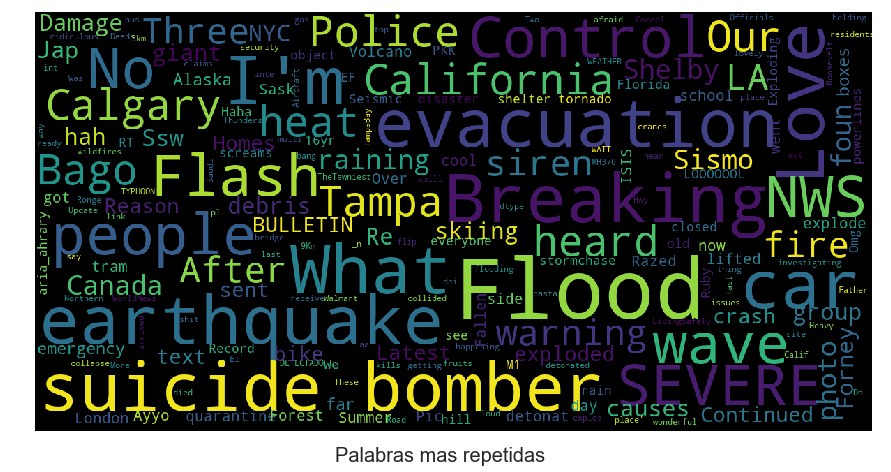

In [28]:
word_cloud(tweet_list.text,'Palabras mas repetidas')

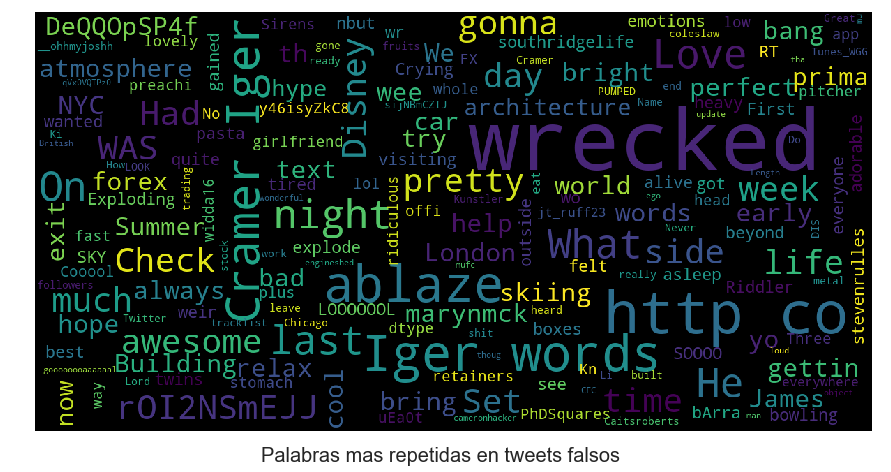

In [15]:
word_cloud(tweet_list[tweet_list.target==0].text,'Palabras mas repetidas en tweets falsos')

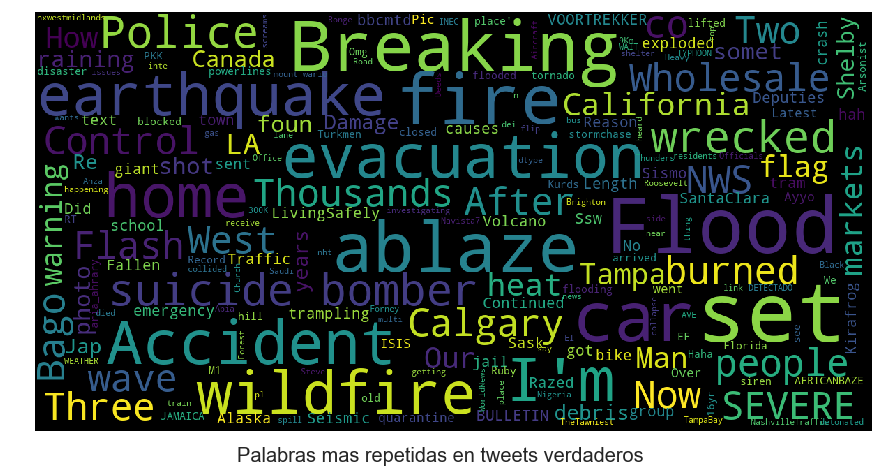

In [17]:
word_cloud(tweet_list[tweet_list.target==1].text,'Palabras mas repetidas en tweets verdaderos')

# Grafico de caracteres por tweets

Text(0.5,0.98,'Cantidad de caracteres en tweets')

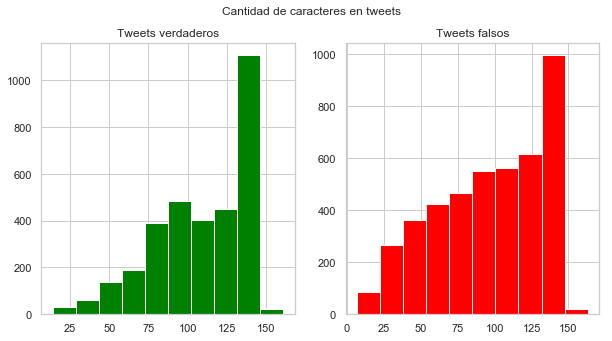

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet_list[tweet_list.target==1].text.str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Tweets verdaderos')
tweet_len=tweet_list[tweet_list.target==0].text.str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Tweets falsos')
fig.suptitle('Cantidad de caracteres en tweets')

# Grafico de palabras por tweets

Text(0.5,0.98,'Palabras por tweet')

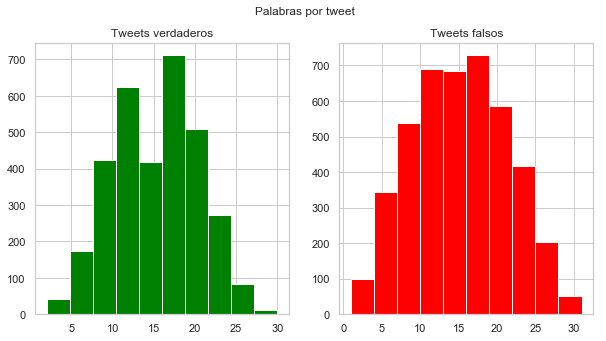

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_words = tweet_list[tweet_list.target==1].text.str.split().map(lambda x: len(x))
ax1.hist(tweet_words, color='green')
ax1.set_title('Tweets verdaderos')
tweet_words = tweet_list[tweet_list.target==0].text.str.split().map(lambda x: len(x))
ax2.hist(tweet_words, color='red')
ax2.set_title('Tweets falsos')
fig.suptitle('Palabras por tweet')

Text(0.5,0.98,'Promedio de largo de palabras por tweet')

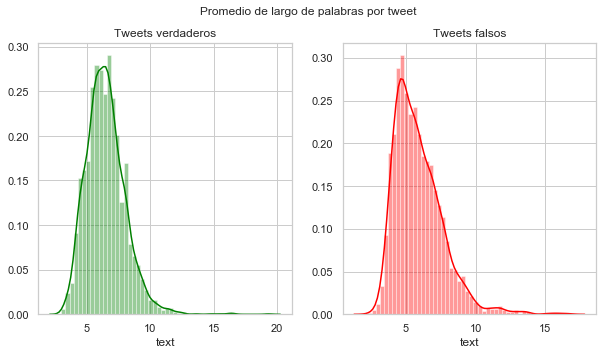

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
tweet_words = tweet_list[tweet_list.target==1].text.str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(tweet_words.map(lambda x: np.mean(x)), color='green')
plt.title('Tweets verdaderos')
plt.subplot(1,2,2)
tweet_words = tweet_list[tweet_list.target==0].text.str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(tweet_words.map(lambda x: np.mean(x)), color='red')
plt.title('Tweets falsos')
plt.suptitle('Promedio de largo de palabras por tweet')